In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 1.Choose a classification dataset and normalize features

In [5]:
# Load the dataset
df=pd.read_csv('/content/Iris.csv')

In [6]:
# Check the first 5-rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# Drop the 'Id' and separate features and labels
features = df.drop(columns=["Id", "Species"])
labels = df["Species"]

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Apply Min-Max normalization
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

In [11]:
# Convert the result back to a DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df["Species"] = labels

In [12]:
normalized_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


 2.Use KNeighborsClassifier from sklearn

In [13]:
# Split features and target
X = normalized_df.drop(columns=["Species"])
y = normalized_df["Species"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Initialize KNN classifier with default n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Predict on test set
y_pred = knn.predict(X_test)

Evaluation

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [29]:
# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [30]:
# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



 3.Experiment with different values of K.

In [34]:
# Try Multiple K Values and Store Accuracy

# Store accuracies for each K
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

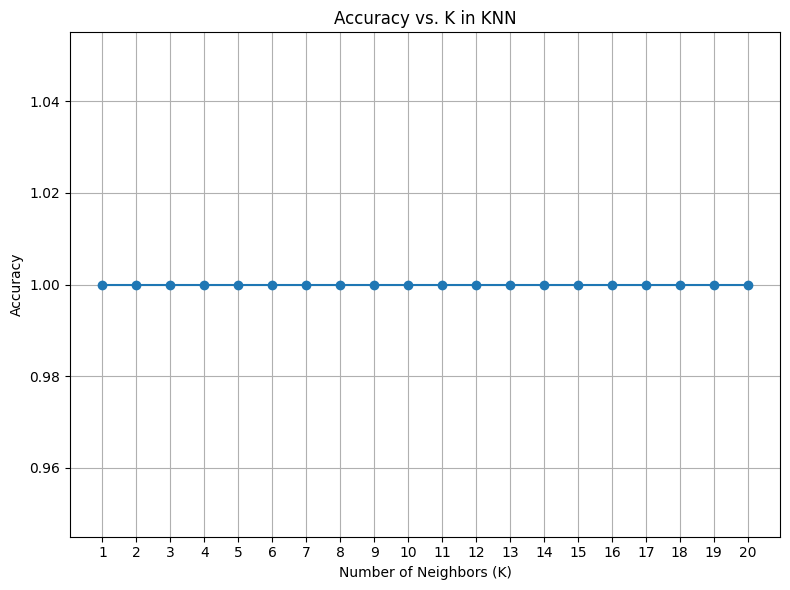

In [37]:
# Plot Accuracy vs. K
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. K in KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Find the Best K
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K is: {best_k} with Accuracy = {max(accuracies):.2f}")

Best K is: 1 with Accuracy = 1.00


 4.Evaluate model using accuracy, confusion matrix.

In [45]:
# Train Model Using Best K
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
# Train the final model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
# Predict on test data
y_pred_final = knn_final.predict(X_test)

In [48]:
# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred_final)
print(f"Accuracy for K={best_k}: {accuracy:.2f}")

Accuracy for K=1: 1.00


In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [50]:
# Classification Report (for precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



5.Visualize decision boundaries.

In [55]:
# Extract Two Features + Target
from matplotlib.colors import ListedColormap

In [56]:
# Use only 2 features
X_vis = normalized_df[['PetalLengthCm', 'PetalWidthCm']].values
y_vis = normalized_df['Species'].astype('category').cat.codes  # Encode species as numbers

In [57]:
# Train KNN on 2D data
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis, y_vis)

KNeighborsClassifier(n_neighbors=1)

Create Meshgrid and Plot Decision Boundaries

In [58]:
# Create a meshgrid
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 0.1, X_vis[:, 0].max() + 0.1
y_min, y_max = X_vis[:, 1].min() - 0.1, X_vis[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [59]:
# Predict on mesh
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [60]:
# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

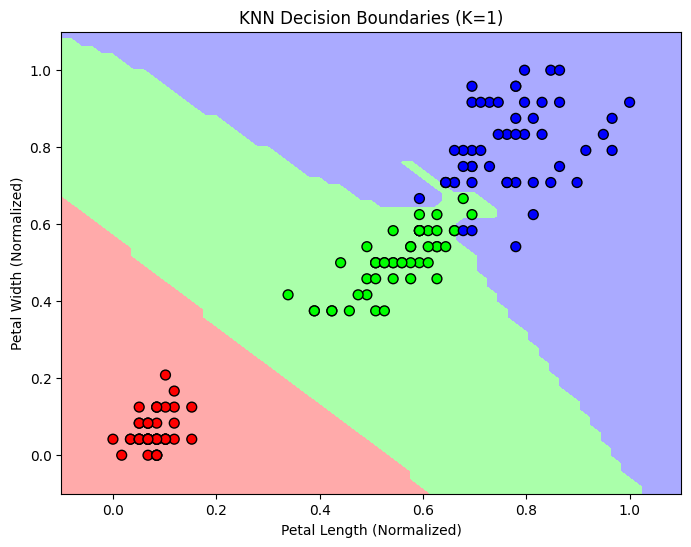

In [64]:
# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Scatter original points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Petal Length (Normalized)')
plt.ylabel('Petal Width (Normalized)')
plt.title(f'KNN Decision Boundaries (K={best_k})')
plt.show()